In [12]:
#imports
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
import os


#Feel free to delete these if you don't want to install them all right away
import xgboost as xgb
from catboost import CatBoostClassifier
#Used sm and smf instead to get these, but can still use them if needed, but sm has better summary() function
from sklearn.linear_model import LinearRegression, LogisticRegression, TweedieRegressor
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import poisson, binom, norm
from scipy.stats import chisquare
import statsmodels.api as sm
import statsmodels.formula.api as smf



from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, make_scorer, roc_auc_score, log_loss, precision_score, recall_score, roc_curve, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from collections import Counter
import scipy.stats as st



#Change this to whereever you save your stuff
os.chdir("C:\ASNA_Case_Comp")


<>:36: SyntaxWarning: invalid escape sequence '\A'
<>:36: SyntaxWarning: invalid escape sequence '\A'
C:\Users\graha\AppData\Local\Temp\ipykernel_29260\1835299192.py:36: SyntaxWarning: invalid escape sequence '\A'
  os.chdir("C:\ASNA_Case_Comp")


In [13]:
#Read in dataset
dat = pd.read_excel("Dataset.xlsx")
dat_one_hot = pd.read_csv("cleanData.csv",header=0)

#Add a column for has claim
dat_one_hot['has_claim'] = dat_one_hot['claim_id'].apply(lambda x: 1 if x !=0 else 0)

count = 0
for row in dat_one_hot['has_claim']:
    if row > 0:
        count+=1
print(count)
#There is this many total claims out of 10000 students

1819


# Reading in Aidan's data segmented by coverage type

In [14]:
dat_expense = pd.read_csv("CleanByCoverage\CleanByCoverage\expenseClean.csv",header=0)
dat_expense['has_claim'] = dat_expense['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_liability = pd.read_csv("CleanByCoverage\CleanByCoverage\liabilityClean.csv",header=0)
dat_liability['has_claim'] = dat_liability['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_medical = pd.read_csv("CleanByCoverage\CleanByCoverage\medicalClean.csv",header=0)
dat_medical['has_claim'] = dat_medical['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_property = pd.read_csv("CleanByCoverage\CleanByCoverage\propertyClean.csv",header=0)
dat_property['has_claim'] = dat_property['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_expense_original = pd.read_csv("OriginalByCoverage\OriginalByCoverage\expense.csv",header=0)
dat_expense_original['has_claim'] = dat_expense_original['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_liability_original = pd.read_csv("OriginalByCoverage\OriginalByCoverage\liability.csv",header=0)
dat_liability_original['has_claim'] = dat_liability_original['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_medical_original = pd.read_csv("OriginalByCoverage\OriginalByCoverage\medical.csv",header=0)
dat_medical_original['has_claim'] = dat_medical_original['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_property_original = pd.read_csv("OriginalByCoverage\OriginalByCoverage\property.csv",header=0)
dat_property_original['has_claim'] = dat_property_original['claim_id'].apply(lambda x: 1 if x !=0 else 0)


<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:7: SyntaxWarning: invalid escape sequence '\C'
<>:10: SyntaxWarning: invalid escape sequence '\C'
<>:13: SyntaxWarning: invalid escape sequence '\O'
<>:16: SyntaxWarning: invalid escape sequence '\O'
<>:19: SyntaxWarning: invalid escape sequence '\O'
<>:22: SyntaxWarning: invalid escape sequence '\O'
<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:7: SyntaxWarning: invalid escape sequence '\C'
<>:10: SyntaxWarning: invalid escape sequence '\C'
<>:13: SyntaxWarning: invalid escape sequence '\O'
<>:16: SyntaxWarning: invalid escape sequence '\O'
<>:19: SyntaxWarning: invalid escape sequence '\O'
<>:22: SyntaxWarning: invalid escape sequence '\O'
C:\Users\graha\AppData\Local\Temp\ipykernel_29260\766309216.py:1: SyntaxWarning: invalid escape sequence '\C'
  dat_expense = pd.read_csv("CleanByCoverage\CleanByCoverage\expenseClean.csv",h

# Trying out a bunch of models on different areas of data that were identified by Aidan

Logistic and OLS

In [68]:
# Model for Additional Living Expense
dat_expense_train = dat_expense[dat_expense['holdout'] == 0]
dat_expense_valid = dat_expense[dat_expense['holdout'] == 1]

dat_expense_train.drop(columns=['holdout'])
dat_expense_valid.drop(columns=['holdout'])
#The split is 7997:2019


model_ols_expense_general = smf.ols('amount ~ gpa + greek + off_campus + sprinklered', data = dat_expense_train)
model_logit_expense_general = smf.logit('has_claim ~ gpa + greek + off_campus + sprinklered',data = dat_expense_train)

result_ols_expense_general = model_ols_expense_general.fit()
result_logit_expense_general = model_logit_expense_general.fit()


print(result_ols_expense_general.summary())
print(result_logit_expense_general.summary())


Optimization terminated successfully.
         Current function value: 0.207021
         Iterations 7
                            OLS Regression Results                            
Dep. Variable:                 amount   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     60.39
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           2.48e-50
Time:                        16:49:24   Log-Likelihood:                -70509.
No. Observations:                7997   AIC:                         1.410e+05
Df Residuals:                    7992   BIC:                         1.411e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

Tweedie

In [16]:
#Trying out a Tweedie Regressor for amount as it is *continuous*
p = 1.5 #Power for tweedie 
Y_tweedie = dat_expense_train['amount']
X_tweedie = dat_expense_train[['greek','distance_to_campus','sprinklered']]
#X_tweedie = dat_expense_train[['greek','distance_to_campus','sprinklered','GMale','GFemale','GOther']]
#X_tweedie = dat_expense_train[['greek','distance_to_campus','sprinklered','GMale','GFemale','GOther','SHumanities','SBusiness','SScience']]
# X_tweedie = dat_expense_train[['greek','distance_to_campus','sprinklered',
#                                'GMale','GFemale','GOther',
#                                'SHumanities','SBusiness','SScience',
#                                'CFreshman','CSophomore','CJunior','CSenior']]

X_tweedie = sm.add_constant(X_tweedie)

model_tweedie_expense_general = sm.GLM(Y_tweedie,X_tweedie, family=sm.families.Tweedie(var_power=p, link=sm.families.links.log())) 
results_tweedie_expense_general = model_tweedie_expense_general.fit() 
print(results_tweedie_expense_general.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 amount   No. Observations:                 7997
Model:                            GLM   Df Residuals:                     7993
Model Family:                 Tweedie   Df Model:                            3
Link Function:                    log   Scale:                          380.19
Method:                          IRLS   Log-Likelihood:                -5834.2
Date:                Fri, 28 Nov 2025   Deviance:                   7.7011e+05
Time:                        23:48:14   Pearson chi2:                 3.04e+06
No. Iterations:                    14   Pseudo R-squ. (CS):            0.02822
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.3712      0

c:\Users\graha\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [17]:
#Trying out a Tweedie Regressor for has_claim as it is *discrete*
Y_tweedie2 = dat_expense_train['has_claim'] 
X_tweedie2 = dat_expense_train[['greek','distance_to_campus','sprinklered']]
#X_tweedie2 = dat_expense_train[['greek','distance_to_campus','sprinklered','GMale','GFemale','GOther']]
#X_tweedie2 = dat_expense_train[['greek','distance_to_campus','sprinklered','GMale','GFemale','GOther','SHumanities','SBusiness','SScience']]
# X_tweedie2 = dat_expense_train[['greek','distance_to_campus','sprinklered',
#                                'GMale','GFemale','GOther',
#                                'SHumanities','SBusiness','SScience',
#                                'CFreshman','CSophomore','CJunior','CSenior']]

X_tweedie2 = sm.add_constant(X_tweedie2)

model_tweedie2_expense_general = sm.GLM(Y_tweedie2,X_tweedie2, family=sm.families.Binomial(link=sm.families.links.logit())) 
results_tweedie2_expense_general = model_tweedie2_expense_general.fit() 
print(results_tweedie2_expense_general.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              has_claim   No. Observations:                 7997
Model:                            GLM   Df Residuals:                     7993
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1656.6
Date:                Fri, 28 Nov 2025   Deviance:                       3313.2
Time:                        23:48:14   Pearson chi2:                 8.00e+03
No. Iterations:                     6   Pseudo R-squ. (CS):           0.006766
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.0231      0

c:\Users\graha\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(


XGBoost

In [72]:
Y_boost = dat_expense_train['has_claim']
# X_boost = dat_expense_train[['greek','distance_to_campus','sprinklered']]
X_boost = dat_expense_train[['greek','distance_to_campus','sprinklered',
                               'GMale','GFemale','GOther',
                               'SHumanities','SBusiness','SScience',
                               'CFreshman','CSophomore','CJunior','CSenior']]

Y_boost_valid = dat_expense_valid[['has_claim']] 
# X_boost_valid = dat_expense_valid[['greek','distance_to_campus','sprinklered']]
X_boost_valid = dat_expense_valid[['greek','distance_to_campus','sprinklered',
                               'GMale','GFemale','GOther',
                               'SHumanities','SBusiness','SScience',
                               'CFreshman','CSophomore','CJunior','CSenior']]

# XGBoost classifier
model_xgb_expense = xgb.XGBClassifier(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss'
)

model_xgb_expense.fit(X_boost, Y_boost)

y_pred_label_boost = model_xgb_expense.predict(X_boost_valid)
y_predicted_boost = model_xgb_expense.predict_proba(X_boost_valid)[:, 1]

accuracy_boost = accuracy_score(Y_boost_valid, y_pred_label_boost)
print("Accuracy:", accuracy_boost)

auc_boost_expense = roc_auc_score(Y_boost_valid, y_predicted_boost)
print("AUC:", auc_boost_expense)

#Use shap to decipher values on XGBoost
# explainer = shap.TreeExplainer(model_xgb_expense)
# shap_values = explainer.shap_values(X_boost_valid)
# shap.summary_plot(shap_values, X_boost_valid)
# shap.summary_plot(shap_values, X_boost_valid, plot_type="bar")




Accuracy: 0.9529470034670628
AUC: 0.6395201882043987


Random Forest

In [69]:
Y_forest = dat_expense_train['has_claim']
X_forest = dat_expense_train[['greek','off_campus','sprinklered']]
# X_forest = dat_expense_train[['greek','distance_to_campus','sprinklered',
#                                'GMale','GFemale','GOther',
#                                'SHumanities','SBusiness','SScience',
#                                'CFreshman','CSophomore','CJunior','CSenior']]

Y_forest_valid = dat_expense_valid['has_claim']
X_forest_valid = dat_expense_valid[['greek','off_campus','sprinklered']]
# X_forest_valid = dat_expense_valid[['greek','distance_to_campus','sprinklered',
#                                'GMale','GFemale','GOther',
#                                'SHumanities','SBusiness','SScience',
#                                'CFreshman','CSophomore','CJunior','CSenior']]

rf_expense = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    bootstrap=True,
    random_state=1234
)

rf_expense.fit(X_forest, Y_forest)

pred_proba = rf_expense.predict_proba(X_forest_valid)[:, 1]
pred_label = rf_expense.predict(X_forest_valid)

# Evaluate
auc_rf_expense = roc_auc_score(Y_forest_valid, pred_proba)
acc_rf_expense = accuracy_score(Y_forest_valid, pred_label)

print("AUC:", auc_rf_expense)
print("Accuracy:", acc_rf_expense)

#Shap doesn't work on python 3.13.x, I just got lucky the first time.

AUC: 0.6564558485611118
Accuracy: 0.9529470034670628


# Calculating Claim Frequency

In [20]:
print('Frequency for Additional Expense Coverage')
claim_frequency_expense = list(zip(dat_expense_original['has_claim'], dat_expense_original['risk_tier']))
claim_frequency_expense_counts = Counter(claim_frequency_expense)
for item, count in claim_frequency_expense_counts.items():
    print(f'{item}: {count}')

print('Frequency for Liability Coverage')
claim_frequency_liability = list(zip(dat_liability_original['has_claim'], dat_liability_original['risk_tier']))
claim_frequency_liability_counts = Counter(claim_frequency_liability)
for item, count in claim_frequency_liability_counts.items():
    print(f'{item}: {count}')

print('Frequency for Medical Coverage')
claim_frequency_medical = list(zip(dat_medical_original['has_claim'], dat_medical_original['risk_tier']))
claim_frequency_medical_counts = Counter(claim_frequency_medical)
for item, count in claim_frequency_medical_counts.items():
    print(f'{item}: {count}')

print('Frequency for Property Coverage')
claim_frequency_property = list(zip(dat_property_original['has_claim'], dat_property_original['risk_tier']))
claim_frequency_property_counts = Counter(claim_frequency_property)
for item, count in claim_frequency_property_counts.items():
    print(f'{item}: {count}')

Frequency for Additional Expense Coverage
(0, 2): 2100
(0, 3): 3124
(0, 1): 4264
(1, 2): 111
(1, 1): 255
(1, 3): 162
Frequency for Liability Coverage
(0, 2): 2190
(0, 3): 3251
(0, 1): 4474
(1, 3): 28
(1, 2): 19
(1, 1): 38
Frequency for Medical Coverage
(0, 2): 2154
(0, 3): 3209
(0, 1): 4408
(1, 3): 72
(1, 2): 55
(1, 1): 106
Frequency for Property Coverage
(0, 2): 1999
(0, 3): 3011
(0, 1): 4068
(1, 1): 470
(1, 3): 281
(1, 2): 222


# Modelling Claim Severity

In [21]:
total_loss_expense = dat_expense['amount'].sum()
print(f"Total Expense Loss: {total_loss_expense:,.2f}")

total_claims_expense = dat_expense['has_claim'].sum()
print(f"Total Expense Claims: {total_claims_expense}")

severity_expense = total_loss_expense / total_claims_expense
print(f"Expense Severity (Loss per Claim): {severity_expense:,.2f}")

total_loss_property = dat_property['amount'].sum()
print(f"Total Property Loss: {total_loss_property:,.2f}")

total_claims_property = dat_property['has_claim'].sum()
print(f"Total Property Claims: {total_claims_property}")

severity_property = total_loss_property / total_claims_property
print(f"Property Severity (Loss per Claim): {severity_property:,.2f}")

total_loss_medical = dat_medical['amount'].sum()
print(f"Total Medical Loss: {total_loss_medical:,.2f}")

total_claims_medical = dat_medical['has_claim'].sum()
print(f"Total Medical Claims: {total_claims_medical}")

severity_medical = total_loss_medical / total_claims_medical
print(f"Medical Severity (Loss per Claim): {severity_medical:,.2f}")

total_loss_liability = dat_liability['amount'].sum()
print(f"Total Liability Loss: {total_loss_liability:,.2f}")

total_claims_liability = dat_liability['has_claim'].sum()
print(f"Total Liability Claims: {total_claims_liability}")

severity_liability = total_loss_liability / total_claims_liability
print(f"Liability Severity (Loss per Claim): {severity_liability:,.2f}")




Total Expense Loss: 2,911,317.09
Total Expense Claims: 528
Expense Severity (Loss per Claim): 5,513.86
Total Property Loss: 995,460.03
Total Property Claims: 973
Property Severity (Loss per Claim): 1,023.08
Total Medical Loss: 3,870,552.10
Total Medical Claims: 233
Medical Severity (Loss per Claim): 16,611.81
Total Liability Loss: 737,410.81
Total Liability Claims: 85
Liability Severity (Loss per Claim): 8,675.42


Severity for Additional Living Expense Coverage by Risk Tier
Risk Tier 1: 4,533.37
Risk Tier 2: 5,732.04
Risk Tier 3: 6,907.72

Severity for Property Coverage by Risk Tier
Risk Tier 1: 914.25
Risk Tier 2: 1,051.27
Risk Tier 3: 1,182.85

Severity for Medical Coverage by Risk Tier
Risk Tier 1: 14,379.40
Risk Tier 2: 17,255.91
Risk Tier 3: 19,406.40

Severity for Liability Coverage by Risk Tier
Risk Tier 1: 8,938.80
Risk Tier 2: 7,080.32
Risk Tier 3: 9,400.37



C:\Users\graha\AppData\Local\Temp\ipykernel_29260\1200269035.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  severity_by_tier = df.groupby('risk_tier').apply(
C:\Users\graha\AppData\Local\Temp\ipykernel_29260\1200269035.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  severity_by_tier = df.groupby('risk_tier').apply(
C:\Users\graha\AppData\Local\Temp\ipykernel_29260\1200269035.py:9: FutureWarning: DataFrameGro

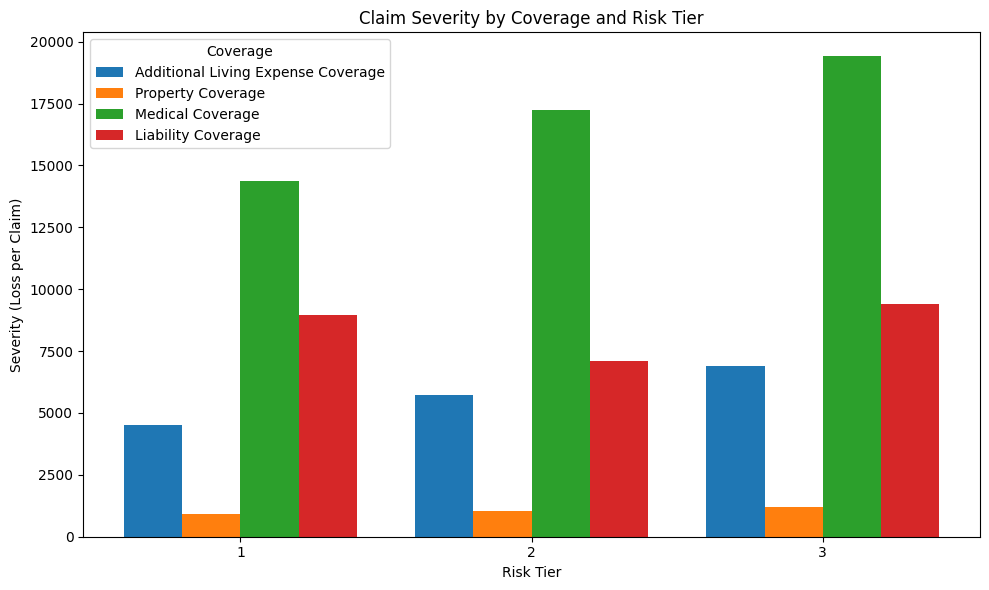

In [22]:

def print_and_plot_severity_by_tier(datasets):
    """
    datasets: dict of {coverage_name: dataframe}
    """
    severity_data = {}

    for coverage_name, df in datasets.items():
        print(f"Severity for {coverage_name} by Risk Tier")
        severity_by_tier = df.groupby('risk_tier').apply(
            lambda x: x['amount'].sum() / x['has_claim'].sum() if x['has_claim'].sum() > 0 else 0
        ).sort_index()
        severity_data[coverage_name] = severity_by_tier  

        for tier, sev in severity_by_tier.items():
            print(f"Risk Tier {tier}: {sev:,.2f}")
        print() 

    severity_df = pd.DataFrame(severity_data).fillna(0)
    risk_tiers = severity_df.index.tolist()
    x = np.arange(len(risk_tiers))
    width = 0.2

    fig, ax = plt.subplots(figsize=(10,6))
    for i, cov in enumerate(severity_df.columns):
        ax.bar(x + i*width, severity_df[cov].values, width=width, label=cov)

    ax.set_xlabel("Risk Tier")
    ax.set_ylabel("Severity (Loss per Claim)")
    ax.set_title("Claim Severity by Coverage and Risk Tier")
    ax.set_xticks(x + width*1.5)  # center the x-axis labels
    ax.set_xticklabels(risk_tiers)
    ax.legend(title="Coverage")

    plt.tight_layout()
    plt.show()


# Example usage
datasets = {
    "Additional Living Expense Coverage": dat_expense_original,
    "Property Coverage": dat_property_original,
    "Medical Coverage": dat_medical_original,
    "Liability Coverage": dat_liability_original
}

print_and_plot_severity_by_tier(datasets)

Severity for Additional Living Expense Coverage by Risk Tier
Risk Tier 1: 255.81
Risk Tier 2: 287.77
Risk Tier 3: 340.55

Severity for Property Coverage by Risk Tier
Risk Tier 1: 94.69
Risk Tier 2: 105.08
Risk Tier 3: 100.97

Severity for Medical Coverage by Risk Tier
Risk Tier 1: 337.66
Risk Tier 2: 429.64
Risk Tier 3: 425.86

Severity for Liability Coverage by Risk Tier
Risk Tier 1: 75.28
Risk Tier 2: 60.90
Risk Tier 3: 80.27



C:\Users\graha\AppData\Local\Temp\ipykernel_29260\2670582953.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  severity_by_tier = df.groupby('risk_tier').apply(
C:\Users\graha\AppData\Local\Temp\ipykernel_29260\2670582953.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  severity_by_tier = df.groupby('risk_tier').apply(
C:\Users\graha\AppData\Local\Temp\ipykernel_29260\2670582953.py:9: FutureWarning: DataFrameGro

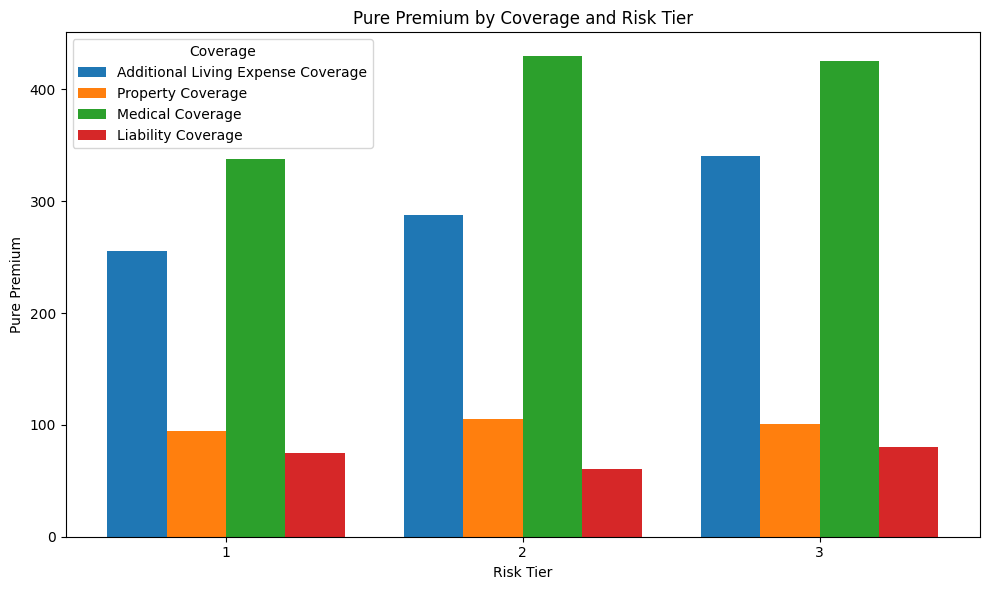

In [23]:

def print_and_plot_pure_premium_by_tier(datasets):
    """
    datasets: dict of {coverage_name: dataframe}
    """
    severity_data = {}

    for coverage_name, df in datasets.items():
        print(f"Severity for {coverage_name} by Risk Tier")
        severity_by_tier = df.groupby('risk_tier').apply(
            lambda x: x['amount'].sum() / len(x['has_claim'])
        ).sort_index()
        severity_data[coverage_name] = severity_by_tier  

        for tier, sev in severity_by_tier.items():
            print(f"Risk Tier {tier}: {sev:,.2f}")
        print() 

    severity_df = pd.DataFrame(severity_data).fillna(0)
    risk_tiers = severity_df.index.tolist()
    x = np.arange(len(risk_tiers))
    width = 0.2

    fig, ax = plt.subplots(figsize=(10,6))
    for i, cov in enumerate(severity_df.columns):
        ax.bar(x + i*width, severity_df[cov].values, width=width, label=cov)

    ax.set_xlabel("Risk Tier")
    ax.set_ylabel("Pure Premium")
    ax.set_title("Pure Premium by Coverage and Risk Tier")
    ax.set_xticks(x + width*1.5)  # center the x-axis labels
    ax.set_xticklabels(risk_tiers)
    ax.legend(title="Coverage")

    plt.tight_layout()
    plt.show()

print_and_plot_pure_premium_by_tier(datasets)

# Proving that sections of people in the code follow distributions

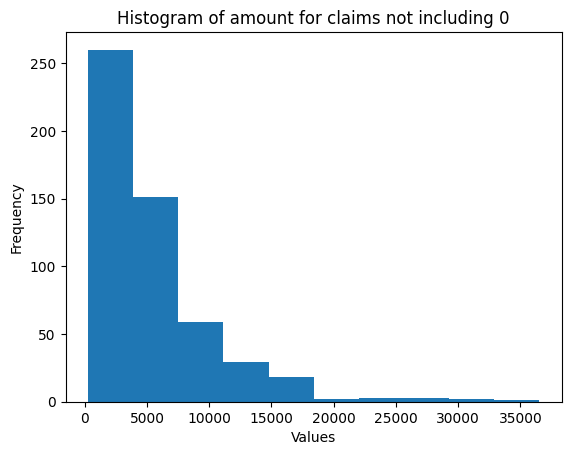

0.003440367263178311


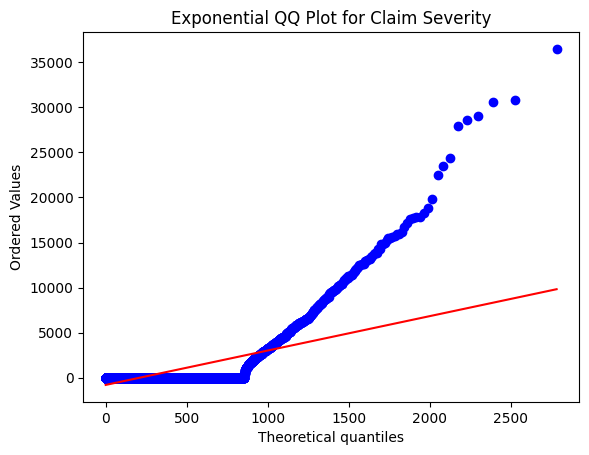

C:\Users\graha\AppData\Local\Temp\ipykernel_29260\2899948280.py:25: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, np.log(y))


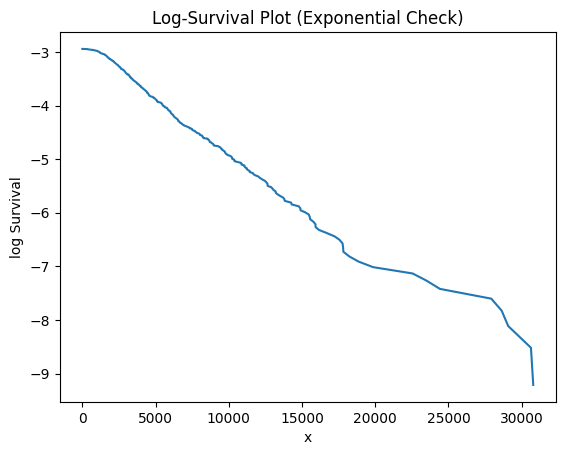

AndersonResult(statistic=inf, critical_values=array([0.922, 1.078, 1.341, 1.606, 1.957]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.0, scale=290.6666421061602)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [24]:
# This is in accordance with helping to calculate basic metrics, that will also lead us to help develop a framework for stress testing, PML, etc.

#Lets group claim amount by risk tier to find E[Loss] per risk tier
#Want to hopefully show each region follows some distribution, first will make histograms

vals0 = dat_expense.loc[dat_expense['amount'] != 0, 'amount']
plt.hist(vals0, bins=10)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of amount for claims not including 0")
plt.show()

#Performing a goodness of fit test using QQ-plots
vals = dat_expense['amount']
lam = 1 / vals.mean()
print(lam)

st.probplot(vals, dist="expon", sparams=(0, 1/lam), plot=plt)
plt.title("Exponential QQ Plot for Claim Severity")
plt.show()

ecdf = sm.distributions.ECDF(vals)
x = np.sort(vals)
y = 1 - ecdf(x)
plt.plot(x, np.log(y))
plt.xlabel("x")
plt.ylabel("log Survival")
plt.title("Log-Survival Plot (Exponential Check)")
plt.show()



st.kstest(vals, 'expon', args=(0, 1/lam))
st.anderson(vals, dist='expon')



The above results demonstrate that claims do not follow an exponential, as the tail is heavier

Estimated mean = 8.300180851162567
Estimated std = 0.8027279188635833


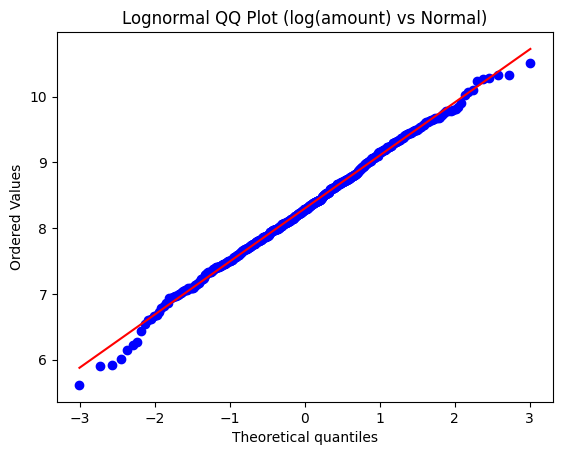

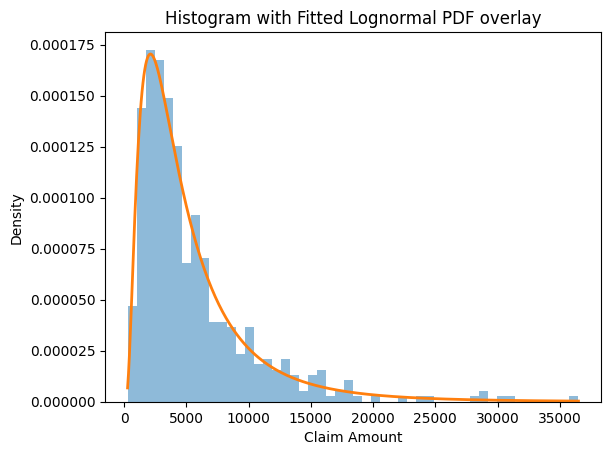

C:\Users\graha\AppData\Local\Temp\ipykernel_29260\1658113546.py:41: RuntimeWarning: divide by zero encountered in log
  plt.plot(sorted_vals, np.log(surv_emp), label="Empirical (derived) distribution")


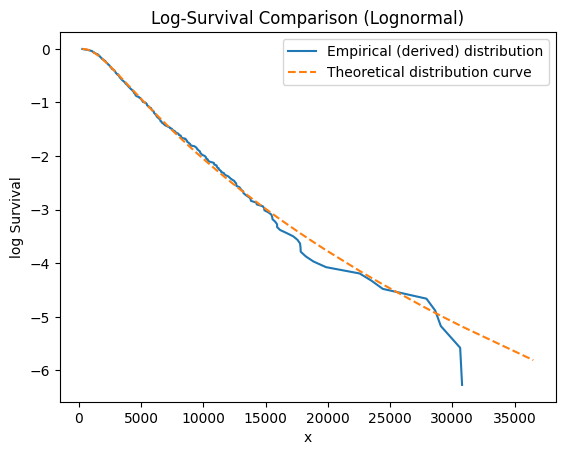

KS statistic: 0.018643939466284398
p-value: 0.9914187403159496
AndersonResult(statistic=0.22611609085220152, critical_values=array([0.572, 0.651, 0.781, 0.911, 1.084]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=8.300180851162567, scale=0.803489159355999)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Frequency: 0.052715654952076675
Severity: 5554.517874422641
Expected Loss: 292.81004769320634


In [25]:
#Attempting log-normal
# extract severity values (positive only)
vals = dat_expense.loc[dat_expense['amount'] > 0, 'amount']

# take logs for lognormal testing
log_vals = np.log(vals)

# fit lognormal: returns shape (sigma), loc (should be 0), scale (exp(mu))
sigma_expense, loc, scale = st.lognorm.fit(vals, floc=0)
mu_expense = np.log(scale)

print("Estimated mean =", mu_expense)
print("Estimated std =", sigma_expense)

st.probplot(log_vals, dist="norm", plot=plt)
plt.title("Lognormal QQ Plot (log(amount) vs Normal)")
plt.show()

# histogram
count, bins, _ = plt.hist(vals, bins=50, density=True, alpha=0.5)

# fitted PDF
x = np.linspace(vals.min(), vals.max(), 500)
pdf = st.lognorm.pdf(x, s=sigma_expense, scale=np.exp(mu_expense))

plt.plot(x, pdf, linewidth=2)
plt.xlabel("Claim Amount")
plt.ylabel("Density")
plt.title("Histogram with Fitted Lognormal PDF overlay")
plt.show()


# empirical survival
sorted_vals = np.sort(vals)
ecdf = np.arange(1, len(vals)+1) / len(vals)
surv_emp = 1 - ecdf

# theoretical lognormal survival
surv_theo = st.lognorm.sf(sorted_vals, s=sigma_expense, scale=np.exp(mu_expense))

plt.plot(sorted_vals, np.log(surv_emp), label="Empirical (derived) distribution")
plt.plot(sorted_vals, np.log(surv_theo), label="Theoretical distribution curve", linestyle="--")
plt.legend()
plt.xlabel("x")
plt.ylabel("log Survival")
plt.title("Log-Survival Comparison (Lognormal)")
plt.show()

# KS test using the fitted parameters
ks_stat, p_value = st.kstest(vals, 'lognorm', args=(sigma_expense, 0, np.exp(mu_expense)))

print("KS statistic:", ks_stat)
print("p-value:", p_value)

log_vals = np.log(vals)

result = st.anderson(log_vals, dist='norm')
print(result)

#Now to calculate expected loss, we will condition it on the probabiity of a claim occuring

#Find probability of claim
P_claim_expense = dat_expense['has_claim'].sum() / len(dat_expense['has_claim'])

#Formula for expected value of lognormal
severity = np.exp(mu_expense + 0.5 * sigma_expense**2)

#Expected loss (probability * expected value under lognormal of loss)
expected_loss = P_claim_expense * severity

print("Frequency:", P_claim_expense)
print("Severity:", severity)
print("Expected Loss:", expected_loss)


===== Expense_greek =====
Estimated μ = 8.792251500587787
Estimated σ = 0.7860062738715917


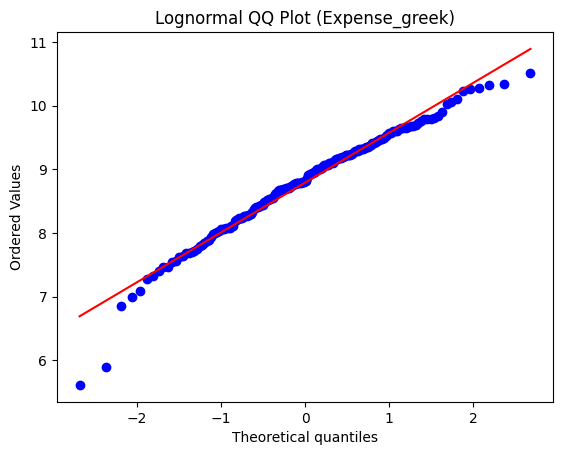

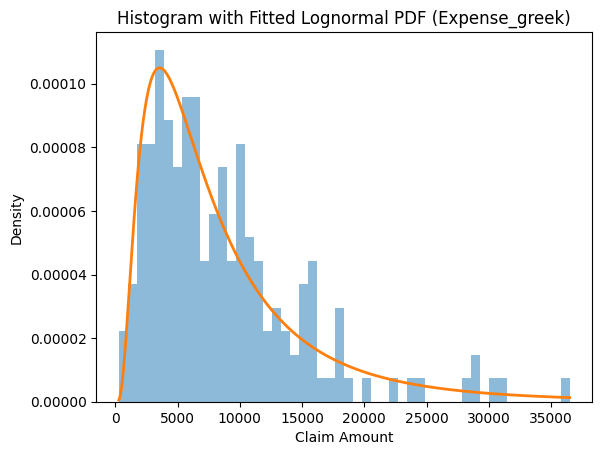

C:\Users\graha\AppData\Local\Temp\ipykernel_29260\3372848256.py:61: RuntimeWarning: divide by zero encountered in log
  plt.plot(sorted_vals, np.log(surv_emp), label="Empirical")


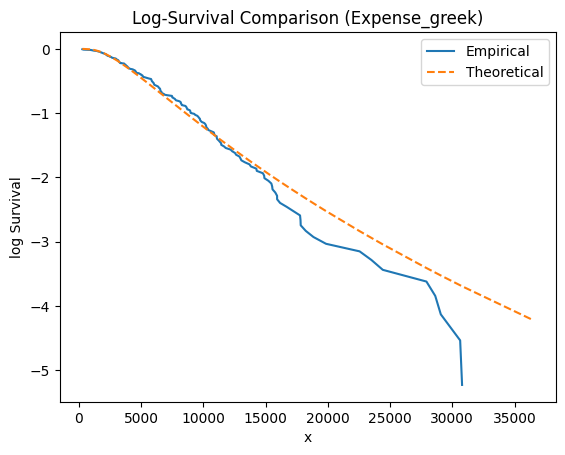

KS statistic: 0.06686195831036945
p-value: 0.35742460262419573
AndersonResult(statistic=0.7900883406078947, critical_values=array([0.564, 0.643, 0.771, 0.899, 1.07 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=8.792251500587787, scale=0.7881163616249932)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Frequency: 0.09516539440203563
Severity: 8965.636948503652
Expected Loss: 853.2183762698132

===== Expense_no_greek =====
Estimated μ = 8.030335656316481
Estimated σ = 0.6733062976959585


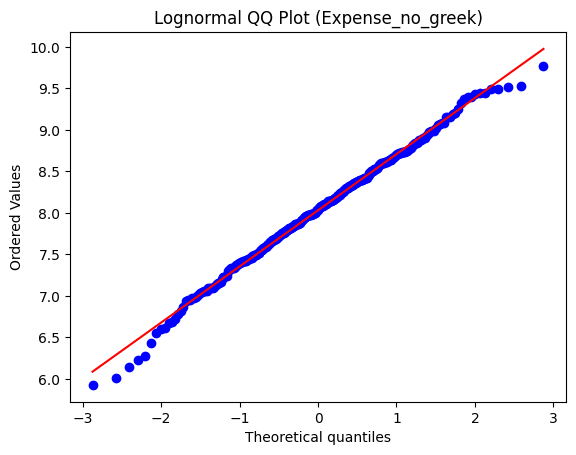

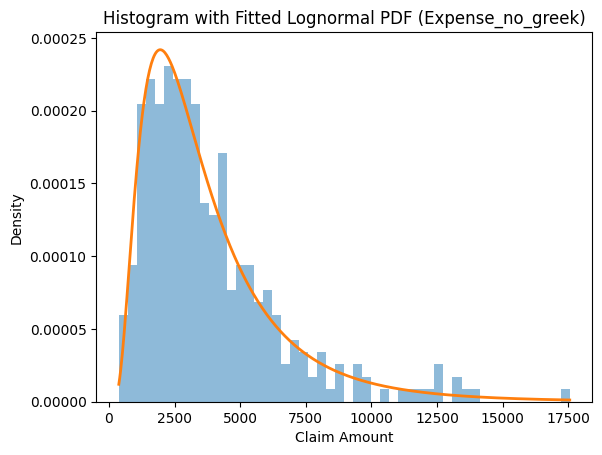

C:\Users\graha\AppData\Local\Temp\ipykernel_29260\3372848256.py:61: RuntimeWarning: divide by zero encountered in log
  plt.plot(sorted_vals, np.log(surv_emp), label="Empirical")


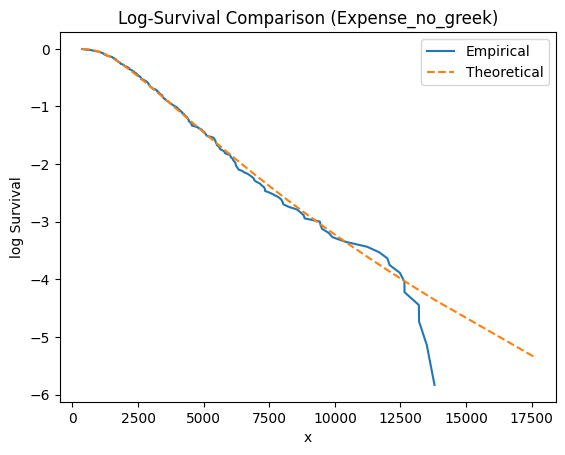

KS statistic: 0.021263760975421264
p-value: 0.9970685900501013
AndersonResult(statistic=0.22472548024677508, critical_values=array([0.569, 0.649, 0.778, 0.908, 1.08 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=8.030335656316481, scale=0.6742957270286886)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Frequency: 0.042439327940261354
Severity: 3854.53764198072
Expected Loss: 163.58398704610147

===== Medical_greek =====
Estimated μ = 9.75170860304146
Estimated σ = 1.0449930588238456


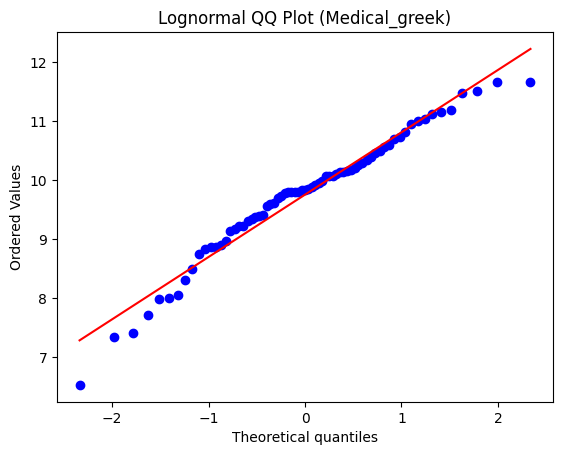

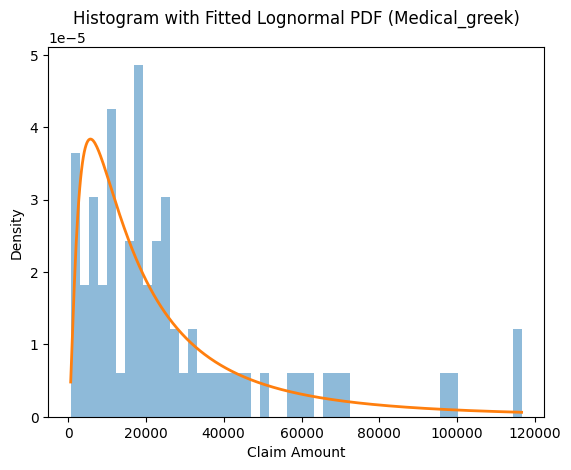

C:\Users\graha\AppData\Local\Temp\ipykernel_29260\3372848256.py:61: RuntimeWarning: divide by zero encountered in log
  plt.plot(sorted_vals, np.log(surv_emp), label="Empirical")


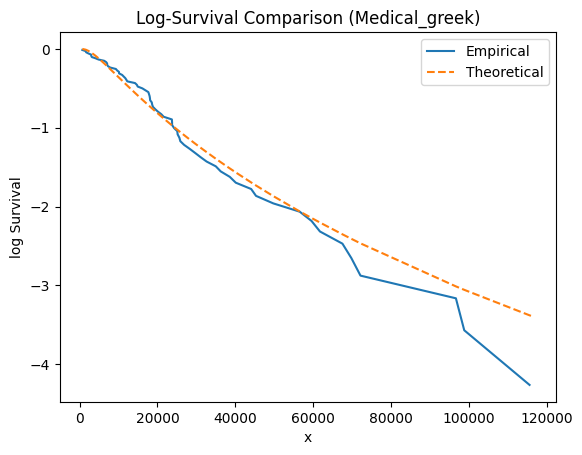

KS statistic: 0.10187079599574589
p-value: 0.42451911304728007
AndersonResult(statistic=0.6745754275592617, critical_values=array([0.548, 0.624, 0.749, 0.873, 1.039]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=9.75170860304146, scale=1.0524308257029886)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Frequency: 0.036132315521628496
Severity: 29664.72325186999
Expected Loss: 1071.8551403983558

===== Medical_no_greek =====
Estimated μ = 8.979976322517073
Estimated σ = 0.9893257823172484


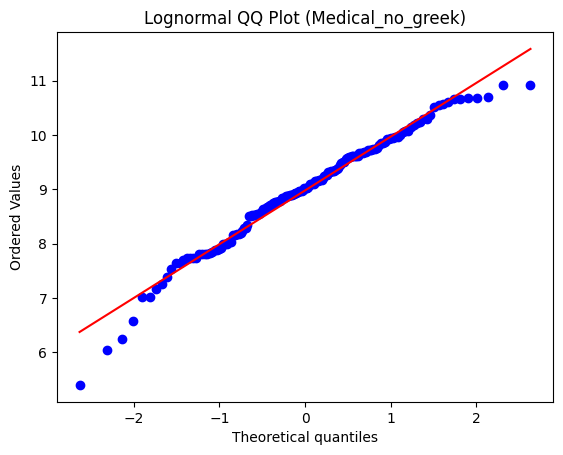

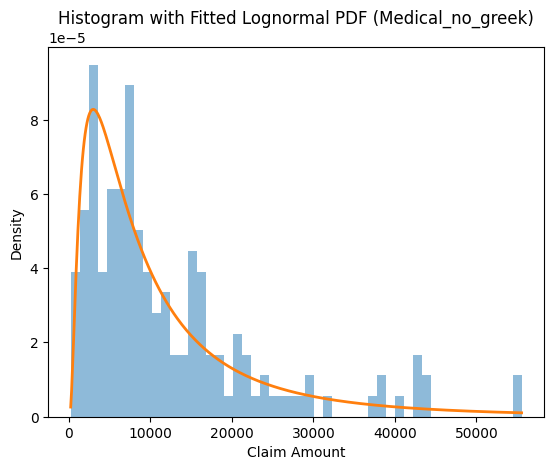

C:\Users\graha\AppData\Local\Temp\ipykernel_29260\3372848256.py:61: RuntimeWarning: divide by zero encountered in log
  plt.plot(sorted_vals, np.log(surv_emp), label="Empirical")


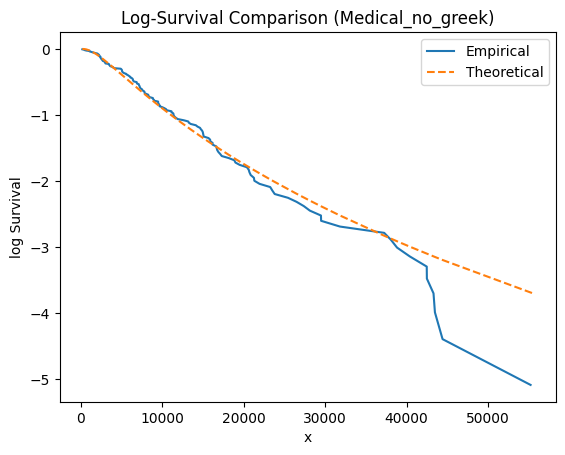

KS statistic: 0.06265588257963584
p-value: 0.5276348514741938
AndersonResult(statistic=0.6579873781391257, critical_values=array([0.563, 0.641, 0.769, 0.897, 1.067]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=8.979976322517073, scale=0.9923934665240439)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Frequency: 0.020161792159303048
Severity: 12956.58036412284
Expected Loss: 261.2278803967517

===== Liability_greek =====
Estimated μ = 8.873775404507777
Estimated σ = 1.067439697992325


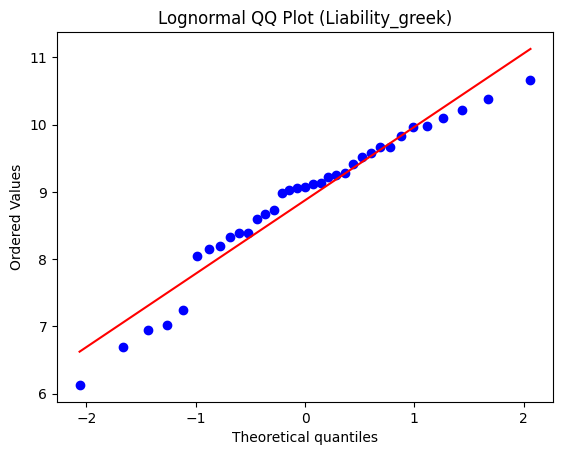

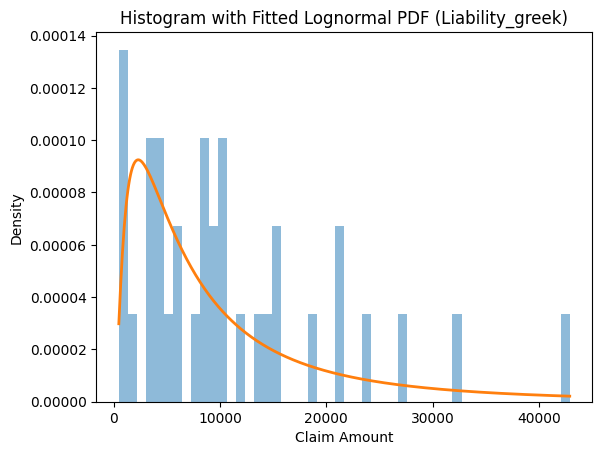

C:\Users\graha\AppData\Local\Temp\ipykernel_29260\3372848256.py:61: RuntimeWarning: divide by zero encountered in log
  plt.plot(sorted_vals, np.log(surv_emp), label="Empirical")


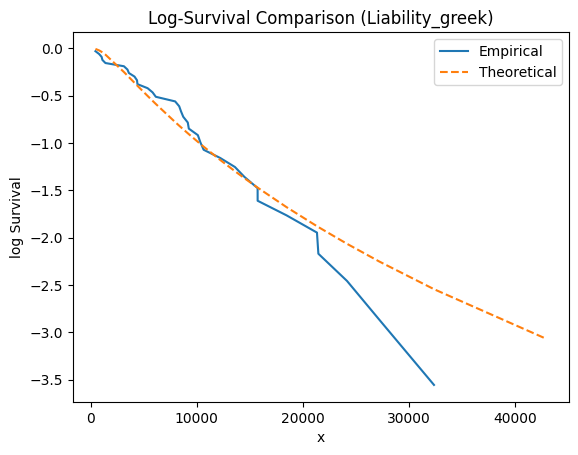

KS statistic: 0.1406144519404876
p-value: 0.452303252850921
AndersonResult(statistic=0.6447726393856712, critical_values=array([0.527, 0.6  , 0.719, 0.839, 0.998]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=8.873775404507777, scale=1.0830235836027073)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Frequency: 0.017811704834605598
Severity: 12625.693191993112
Expected Loss: 224.88512046807068

===== Liability_no_greek =====
Estimated μ = 8.425258924450155
Estimated σ = 1.0886178366432073


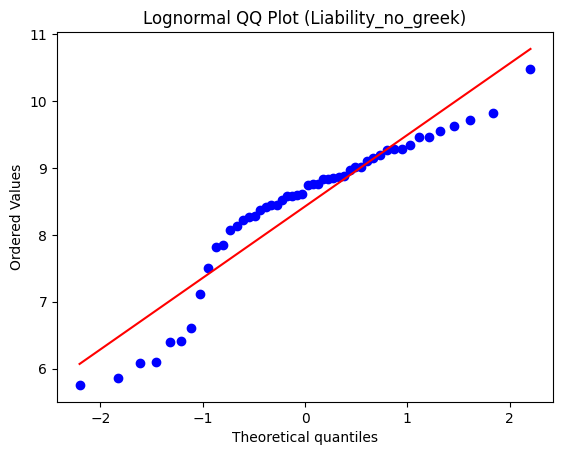

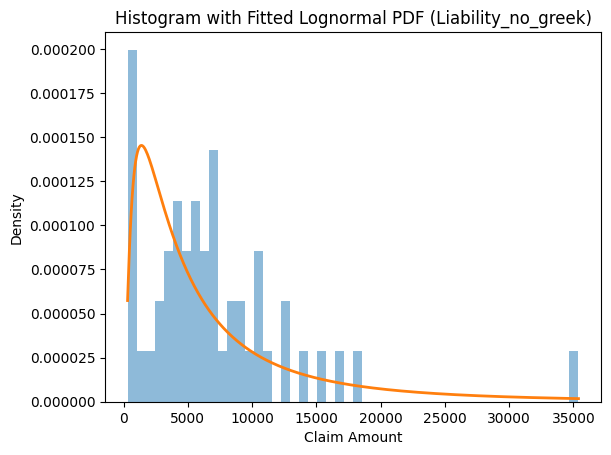

C:\Users\graha\AppData\Local\Temp\ipykernel_29260\3372848256.py:61: RuntimeWarning: divide by zero encountered in log
  plt.plot(sorted_vals, np.log(surv_emp), label="Empirical")


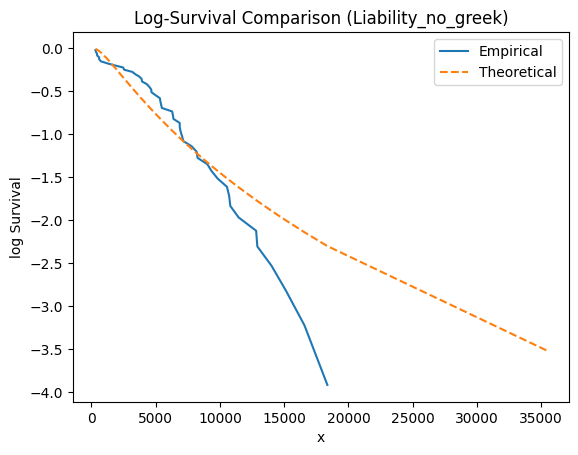

KS statistic: 0.1667075989948399
p-value: 0.11048635886755831
AndersonResult(statistic=2.063074760863934, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=8.425258924450155, scale=1.0996700777300588)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Frequency: 0.006222775357809583
Severity: 8248.63756107672
Expected Loss: 51.32941855057076

===== Property_greek =====
Estimated μ = 7.069795665992642
Estimated σ = 0.7414021940612359


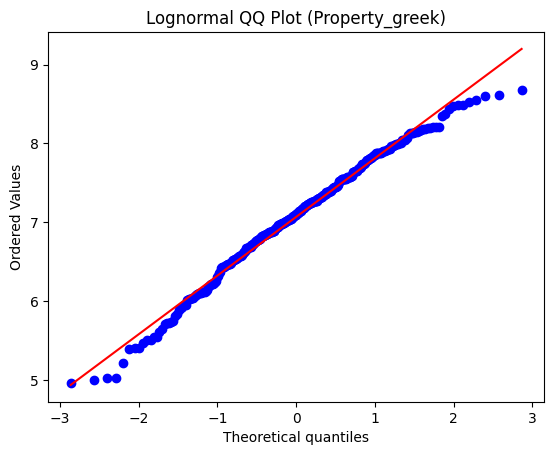

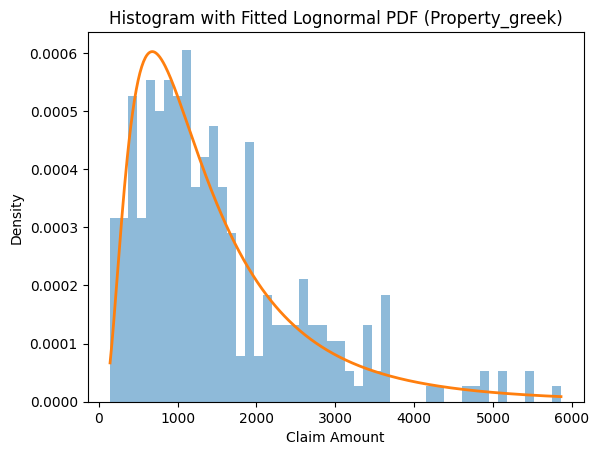

C:\Users\graha\AppData\Local\Temp\ipykernel_29260\3372848256.py:61: RuntimeWarning: divide by zero encountered in log
  plt.plot(sorted_vals, np.log(surv_emp), label="Empirical")


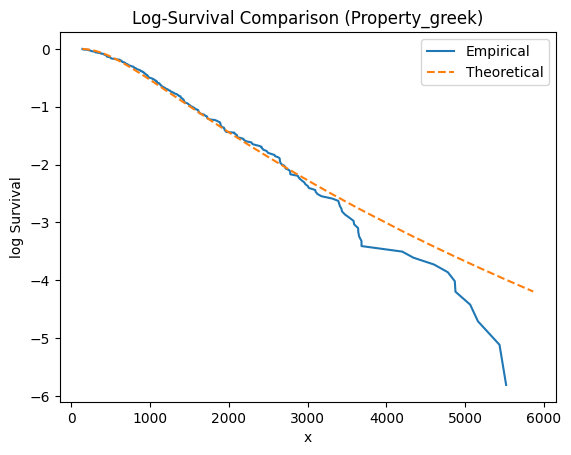

KS statistic: 0.04169789790423495
p-value: 0.595778527544651
AndersonResult(statistic=0.8259809587023028, critical_values=array([0.569, 0.648, 0.778, 0.907, 1.079]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=7.069795665992642, scale=0.7425212923496045)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Frequency: 0.16895674300254454
Severity: 1547.8687638359163
Expected Loss: 261.5228649330912

===== Property_no_greek =====
Estimated μ = 6.42011980277624
Estimated σ = 0.7083362835890147


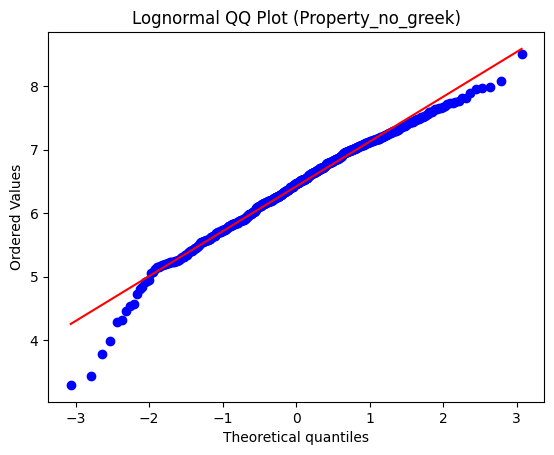

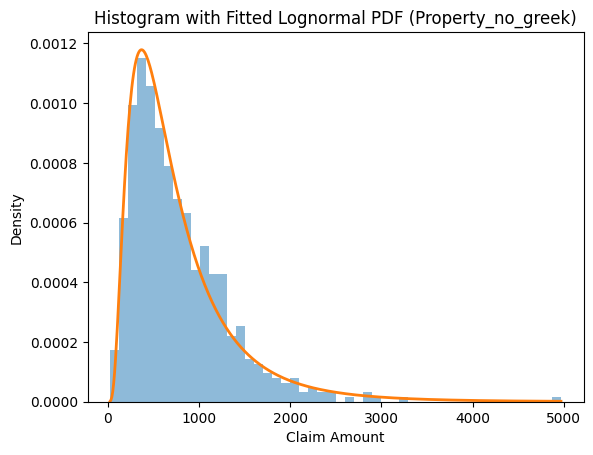

C:\Users\graha\AppData\Local\Temp\ipykernel_29260\3372848256.py:61: RuntimeWarning: divide by zero encountered in log
  plt.plot(sorted_vals, np.log(surv_emp), label="Empirical")


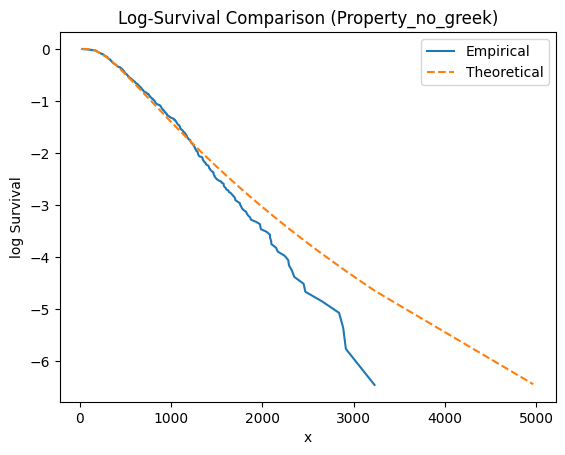

KS statistic: 0.033559510231028655
p-value: 0.4560050197877431
AndersonResult(statistic=1.2698536431738603, critical_values=array([0.572, 0.652, 0.782, 0.912, 1.085]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=6.42011980277624, scale=0.7088894553122056)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Frequency: 0.07977598008711885
Severity: 789.1764616340497
Expected Loss: 62.95732568854086


In [65]:
datasets = {
    'Expense_off': dat_expense[dat_expense['off_campus']==1],
    'Expense_on': dat_expense[dat_expense['off_campus']==0],
    'Medical_off': dat_medical[dat_medical['off_campus']==1],
    'Medical_on': dat_medical[dat_medical['off_campus']==0],
    'Liability_off': dat_liability[dat_liability['off_campus']==1],
    'Liability_on': dat_liability[dat_liability['off_campus']==0],
    'Property_off': dat_property[dat_property['off_campus']==1],
    'Property_on': dat_property[dat_property['off_campus']==0]
}

datasets_greek = {
    'Expense_greek': dat_expense[dat_expense['greek']==1],
    'Expense_no_greek': dat_expense[dat_expense['greek']==0],
    'Medical_greek': dat_medical[dat_medical['greek']==1],
    'Medical_no_greek': dat_medical[dat_medical['greek']==0],
    'Liability_greek': dat_liability[dat_liability['greek']==1],
    'Liability_no_greek': dat_liability[dat_liability['greek']==0],
    'Property_greek': dat_property[dat_property['greek']==1],
    'Property_no_greek': dat_property[dat_property['greek']==0]
}

results = {}

for name, dat in datasets_greek.items():
    print(f"\n===== {name} =====")

    # Extract positive claim amounts
    vals = dat.loc[dat['amount'] > 0, 'amount']
    
    # Take logs
    log_vals = np.log(vals)
    
    # Fit lognormal (shape=sigma, loc=0, scale=exp(mu))
    sigma, loc, scale = st.lognorm.fit(vals, floc=0)
    mu = np.log(scale)
    
    print("Estimated μ =", mu)
    print("Estimated σ =", sigma)
    
    # QQ plot
    st.probplot(log_vals, dist="norm", plot=plt)
    plt.title(f"Lognormal QQ Plot ({name})")
    plt.show()
    
    # Histogram with fitted PDF
    count, bins, _ = plt.hist(vals, bins=50, density=True, alpha=0.5)
    x = np.linspace(vals.min(), vals.max(), 500)
    pdf = st.lognorm.pdf(x, s=sigma, scale=np.exp(mu))
    plt.plot(x, pdf, linewidth=2)
    plt.xlabel("Claim Amount")
    plt.ylabel("Density")
    plt.title(f"Histogram with Fitted Lognormal PDF ({name})")
    plt.show()
    
    # Empirical vs theoretical survival
    sorted_vals = np.sort(vals)
    ecdf = np.arange(1, len(vals)+1) / len(vals)
    surv_emp = 1 - ecdf
    surv_theo = st.lognorm.sf(sorted_vals, s=sigma, scale=np.exp(mu))
    plt.plot(sorted_vals, np.log(surv_emp), label="Empirical")
    plt.plot(sorted_vals, np.log(surv_theo), label="Theoretical", linestyle="--")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("log Survival")
    plt.title(f"Log-Survival Comparison ({name})")
    plt.show()
    
    # KS test
    ks_stat, p_value = st.kstest(vals, 'lognorm', args=(sigma, 0, np.exp(mu)))
    print("KS statistic:", ks_stat)
    print("p-value:", p_value)
    
    # Anderson-Darling test on log-values
    ad_result = st.anderson(log_vals, dist='norm')
    print(ad_result)
    
    # Expected loss
    exposures = len(dat[['student_id']].drop_duplicates())
    P_claim = dat['has_claim'].sum() / exposures
    severity = np.exp(mu + 0.5 * sigma**2)
    expected_loss = P_claim * severity
    
    print("Frequency:", P_claim)
    print("Severity:", severity)
    print("Expected Loss:", expected_loss)
    
    # Save results
    results[name] = {
        'mu': mu,
        'sigma': sigma,
        'frequency': P_claim,
        'severity': severity,
        'expected_loss': expected_loss
    }

# Prove that number of claims for a type of insurance follows a Poisson distribution


=== Expense_off: has_claim ===
Estimated p: 0.0590
Observed variance: 0.0556, Expected variance: 0.0555
Chi-square statistic: 0.0000, p-value: 1.0000


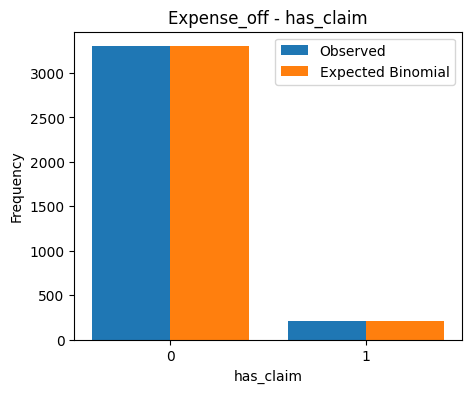


=== Expense_on: has_claim ===
Estimated p: 0.0493
Observed variance: 0.0469, Expected variance: 0.0469
Chi-square statistic: 0.0000, p-value: 1.0000


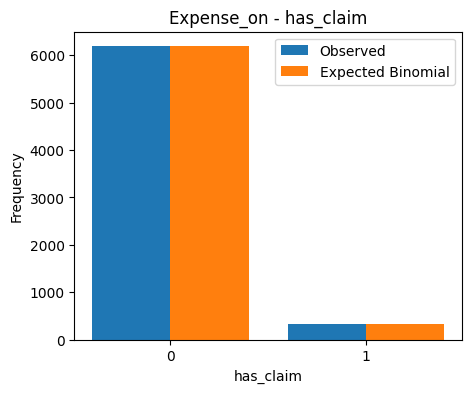


=== Medical_off: has_claim ===
Estimated p: 0.0306
Observed variance: 0.0297, Expected variance: 0.0297
Chi-square statistic: 0.0000, p-value: 1.0000


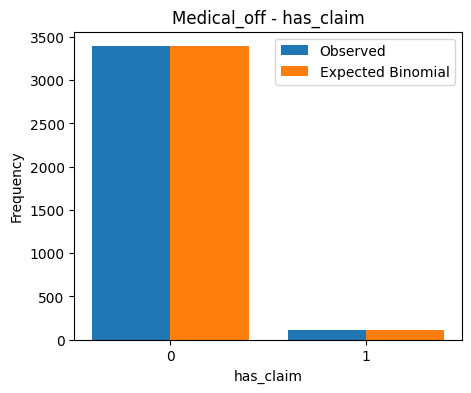


=== Medical_on: has_claim ===
Estimated p: 0.0194
Observed variance: 0.0190, Expected variance: 0.0190
Chi-square statistic: 0.0000, p-value: 1.0000


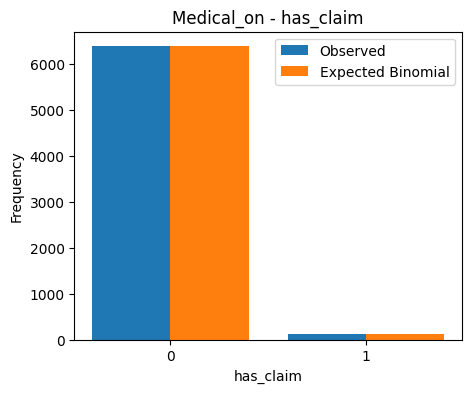


=== Liability_off: has_claim ===
Estimated p: 0.0126
Observed variance: 0.0124, Expected variance: 0.0124
Chi-square statistic: 0.0000, p-value: 1.0000


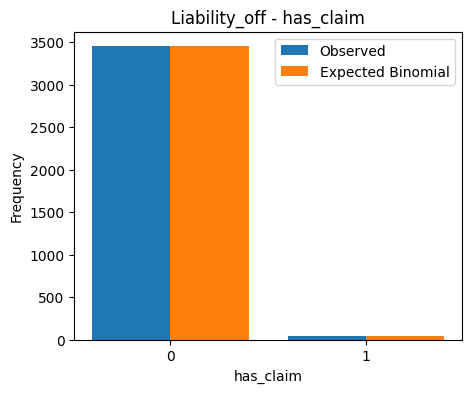


=== Liability_on: has_claim ===
Estimated p: 0.0063
Observed variance: 0.0063, Expected variance: 0.0063
Chi-square statistic: 0.0000, p-value: 1.0000


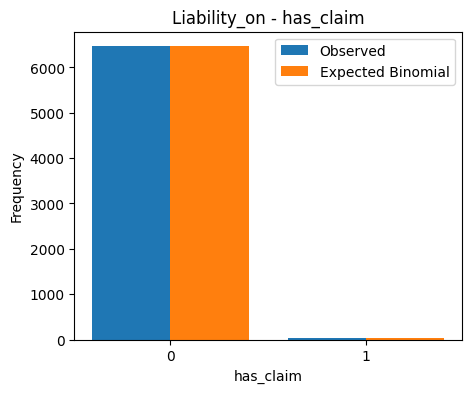


=== Property_off: has_claim ===
Estimated p: 0.1101
Observed variance: 0.0980, Expected variance: 0.0980
Chi-square statistic: 0.0000, p-value: 1.0000


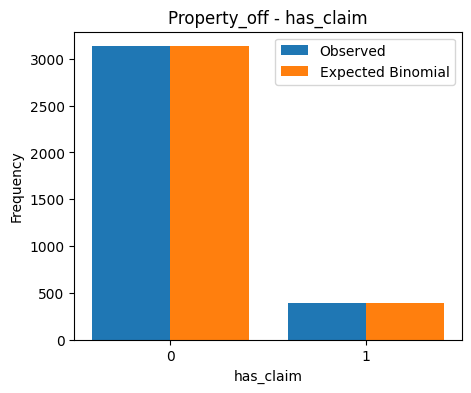


=== Property_on: has_claim ===
Estimated p: 0.0896
Observed variance: 0.0816, Expected variance: 0.0816
Chi-square statistic: 0.0000, p-value: 1.0000


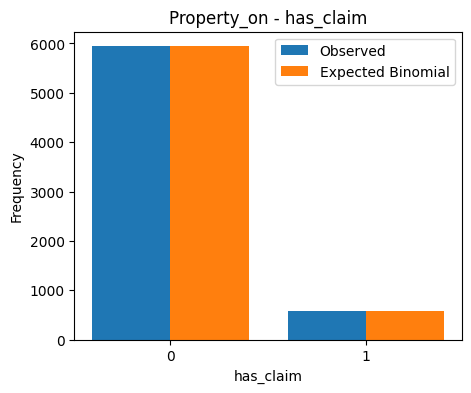

In [66]:
def check_binomial_fit(df, col_name, n=1, dataset_name="Dataset"):
    """
    Checks if a column follows a Binomial distribution.
    
    Parameters:
    - df: pandas DataFrame
    - col_name: column name to check
    - n: number of trials (default 1 for Bernoulli)
    - dataset_name: string for labeling plots
    """
    
    # 1. Estimate p
    p_hat = df[col_name].mean()
    
    # 2. Observed counts
    counts = df[col_name].value_counts().sort_index()
    
    # 3. Expected counts
    expected_counts = [binom.pmf(k, n, p_hat) * len(df) for k in counts.index]
    
    # 4. Variance check
    var_observed = df[col_name].var()
    var_expected = n * p_hat * (1 - p_hat)
    
    print(f"\n=== {dataset_name}: {col_name} ===")
    print(f"Estimated p: {p_hat:.4f}")
    print(f"Observed variance: {var_observed:.4f}, Expected variance: {var_expected:.4f}")
    
    # 5. Chi-square goodness-of-fit
    chi2_stat, p_val = chisquare(f_obs=counts, f_exp=expected_counts)
    print(f"Chi-square statistic: {chi2_stat:.4f}, p-value: {p_val:.4f}")
    
    # 6. Plot observed vs expected
    plt.figure(figsize=(5,4))
    plt.bar(counts.index - 0.2, counts, width=0.4, label="Observed")
    plt.bar(counts.index + 0.2, expected_counts, width=0.4, label="Expected Binomial")
    plt.xticks(counts.index)
    plt.xlabel(col_name)
    plt.ylabel("Frequency")
    plt.title(f"{dataset_name} - {col_name}")
    plt.legend()
    plt.show()
    

# Example usage for all 4 datasets
datasets = {
    'Expense': dat_expense,
    'Medical': dat_medical,
    'Liability': dat_liability,
    'Property': dat_property
}

# Example usage for all 4 datasets
datasets2 = {
    'Expense_off': dat_expense[dat_expense['off_campus']==1],
    'Expense_on': dat_expense[dat_expense['off_campus']==0],
    'Medical_off': dat_medical[dat_medical['off_campus']==1],
    'Medical_on': dat_medical[dat_medical['off_campus']==0],
    'Liability_off': dat_liability[dat_liability['off_campus']==1],
    'Liability_on': dat_liability[dat_liability['off_campus']==0],
    'Property_off': dat_property[dat_property['off_campus']==1],
    'Property_on': dat_property[dat_property['off_campus']==0]
}

datasets_greek = {
    'Expense_greek': dat_expense[dat_expense['greek']==1],
    'Expense_no_greek': dat_expense[dat_expense['greek']==0],
    'Medical_greek': dat_medical[dat_medical['greek']==1],
    'Medical_no_greek': dat_medical[dat_medical['greek']==0],
    'Liability_greek': dat_liability[dat_liability['greek']==1],
    'Liability_no_greek': dat_liability[dat_liability['greek']==0],
    'Property_greek': dat_property[dat_property['greek']==1],
    'Property_no_greek': dat_property[dat_property['greek']==0]
}

for name, df in datasets2.items():
    check_binomial_fit(df, col_name="has_claim", n=1, dataset_name=name)

# Deriving Probable Maximum Loss (PML)

In [28]:
# Simulation parameters
N_sim = 100_000  # number of Monte Carlo simulations
PML_percentiles = [95, 99, 99.5]

# Initialize storage for simulated losses
simulated_losses = {line: np.zeros(N_sim) for line in results.keys()}
simulated_losses['Total'] = np.zeros(N_sim)

# Run Monte Carlo for each line
for line, params in results.items():
    n_exposures = len(eval(f"dat_{line.lower()}"))  # assumes dat_expense, dat_medical, etc.
    p_claim = params['frequency']
    mu = params['mu']
    sigma = params['sigma']
    
    for i in range(N_sim):
        n_claims = np.random.binomial(n_exposures, p_claim)
        if n_claims > 0:
            severities = np.random.lognormal(mean=mu, sigma=sigma, size=n_claims)
            simulated_losses[line][i] = severities.sum()
        else:
            simulated_losses[line][i] = 0
        
        # Add to total portfolio
        simulated_losses['Total'][i] += simulated_losses[line][i]

# Compute PMLs
PML_results = {}
for line, losses in simulated_losses.items():
    PML_results[line] = {f'PML_{p}': np.percentile(losses, p) for p in PML_percentiles}

# Print results
for line, pmls in PML_results.items():
    print(f"\n{line} PMLs:")
    for perc, value in pmls.items():
        print(f"{perc}: {value:,.2f}")
#The probability that the loss exceeds this value(generated one) is equal given p(tested 95% 99% 99.5%)


Expense PMLs:
PML_95: 3,224,605.32
PML_99: 3,351,292.71
PML_99.5: 3,401,746.41

Medical PMLs:
PML_95: 4,961,991.03
PML_99: 5,365,735.61
PML_99.5: 5,547,201.55

Liability PMLs:
PML_95: 1,157,326.02
PML_99: 1,332,889.11
PML_99.5: 1,411,706.48

Property PMLs:
PML_95: 1,085,073.02
PML_99: 1,115,608.85
PML_99.5: 1,127,089.69

Total PMLs:
PML_95: 9,856,555.29
PML_99: 10,299,170.67
PML_99.5: 10,473,111.55


In [29]:
def simulate_portfolio_pml_tvar(results, datasets, N_sim=100_000, PML_percentiles=[95, 99, 99.5]):
    """
    Simulate portfolio losses using compound binomial-lognormal approach,
    and compute PML and TVaR at specified percentiles.
    
    Parameters:
        results: dict containing 'mu', 'sigma', 'frequency' for each line
        datasets: dict of dataframes for each line (to get number of exposures)
        N_sim: number of Monte Carlo simulations
        PML_percentiles: list of percentiles to compute PML and TVaR
    
    Returns:
        Dictionary of PML and TVaR for each line and total portfolio
    """
    
    # Initialize storage
    simulated_losses = {line: np.zeros(N_sim) for line in results.keys()}
    simulated_losses['Total'] = np.zeros(N_sim)
    
    # Monte Carlo simulation
    for line, params in results.items():
        n_exposures = len(datasets[line])
        p_claim = params['frequency']
        mu = params['mu']
        sigma = params['sigma']
        
        for i in range(N_sim):
            n_claims = np.random.binomial(n_exposures, p_claim)
            if n_claims > 0:
                severities = np.random.lognormal(mean=mu, sigma=sigma, size=n_claims)
                simulated_losses[line][i] = severities.sum()
            else:
                simulated_losses[line][i] = 0
            simulated_losses['Total'][i] += simulated_losses[line][i]
    
    # Compute PML and TVaR
    results_metrics = {}
    for line, losses in simulated_losses.items():
        results_metrics[line] = {}
        for p in PML_percentiles:
            PML_val = np.percentile(losses, p)
            TVaR_val = losses[losses >= PML_val].mean()
            results_metrics[line][f'PML_{p}'] = PML_val
            results_metrics[line][f'TVaR_{p}'] = TVaR_val
    
    return results_metrics

In [47]:
datasets = {
    'Expense': dat_expense,
    'Medical': dat_medical,
    'Liability': dat_liability,
    'Property': dat_property
}

#dat_one_hot
# All:
# PML_95: 8,942,100.80
# TVaR_95: 9,183,011.62
# PML_99: 9,320,528.44
# TVaR_99: 9,551,819.19
# PML_99.5: 9,475,667.00
# TVaR_99.5: 9,715,628.62
metrics = simulate_portfolio_pml_tvar(results, datasets)

# Print nicely
for line, vals in metrics.items():
    print(f"\n{line}:")
    for k, v in vals.items():
        print(f"{k}: {v:,.2f}")



Expense:
PML_95: 3,230,172.90
TVaR_95: 3,308,038.04
PML_99: 3,357,328.09
TVaR_99: 3,419,481.26
PML_99.5: 3,402,508.63
TVaR_99.5: 3,461,951.95

Medical:
PML_95: 4,958,945.58
TVaR_95: 5,220,879.34
PML_99: 5,381,024.35
TVaR_99: 5,618,884.19
PML_99.5: 5,545,084.19
TVaR_99.5: 5,783,396.69

Liability:
PML_95: 1,158,138.83
TVaR_95: 1,270,231.60
PML_99: 1,336,638.85
TVaR_99: 1,452,760.10
PML_99.5: 1,413,860.12
TVaR_99.5: 1,535,226.88

Property:
PML_95: 1,089,614.82
TVaR_95: 1,108,707.31
PML_99: 1,120,573.24
TVaR_99: 1,136,388.61
PML_99.5: 1,131,943.49
TVaR_99.5: 1,147,503.18

Total:
PML_95: 9,862,045.18
TVaR_95: 10,141,962.65
PML_99: 10,313,984.53
TVaR_99: 10,573,113.65
PML_99.5: 10,509,821.62
TVaR_99.5: 10,743,877.12


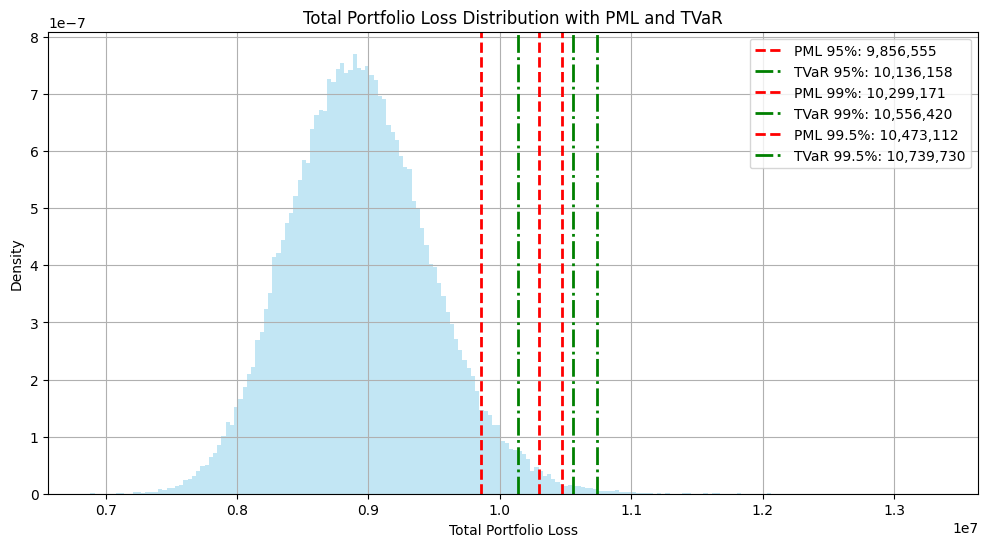

In [31]:
def plot_portfolio_loss_distribution(simulated_losses, PML_percentiles=[95, 99, 99.5]):
    """
    Plots the histogram of total portfolio losses with PML and TVaR percentiles marked.
    
    Parameters:
        simulated_losses: dict containing simulated losses for each line and 'Total'
        PML_percentiles: list of percentiles to mark
    """
    
    total_losses = simulated_losses['Total']
    
    plt.figure(figsize=(12,6))
    
    # Histogram
    plt.hist(total_losses, bins=200, density=True, alpha=0.5, color='skyblue')
    
    # Compute and mark PML and TVaR
    for p in PML_percentiles:
        PML_val = np.percentile(total_losses, p)
        TVaR_val = total_losses[total_losses >= PML_val].mean()
        
        plt.axvline(PML_val, color='red', linestyle='--', linewidth=2, label=f'PML {p}%: {PML_val:,.0f}')
        plt.axvline(TVaR_val, color='green', linestyle='-.', linewidth=2, label=f'TVaR {p}%: {TVaR_val:,.0f}')
    
    plt.xlabel("Total Portfolio Loss")
    plt.ylabel("Density")
    plt.title("Total Portfolio Loss Distribution with PML and TVaR")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_portfolio_loss_distribution(simulated_losses)

# Simulation for higher frequency during storm season in Florida

In [32]:
def simulate_portfolio_pml_tvar_seasonality(results, datasets, N_sim=100_000, PML_percentiles=[95, 99, 99.5]):
    """
    Simulate portfolio losses using compound binomial-lognormal approach with seasonality,
    and compute PML and TVaR at specified percentiles.
    
    Parameters:
        results: dict containing 'mu', 'sigma', 'frequency' for each line
        datasets: dict of dataframes for each line (to get number of exposures)
        N_sim: number of Monte Carlo simulations
        PML_percentiles: list of percentiles to compute PML and TVaR
    
    Returns:
        Dictionary of PML and TVaR for each line and total portfolio
    """
    
    # Define seasonality fractions for Florida hurricane season (June–Nov)
    season_fractions = [0.05, 0.10, 0.25, 0.35, 0.20, 0.05]  # June→Nov
    
    # Initialize storage
    simulated_losses = {line: np.zeros(N_sim) for line in results.keys()}
    simulated_losses['Total'] = np.zeros(N_sim)
    
    # Monte Carlo simulation with seasonality
    for line, params in results.items():
        n_exposures = len(datasets[line])
        p_claim = params['frequency']
        mu = params['mu']
        sigma = params['sigma']
        
        for i in range(N_sim):
            annual_loss = 0
            for f in season_fractions:
                n_claims = np.random.binomial(n_exposures, p_claim * f)
                if n_claims > 0:
                    severities = np.random.lognormal(mean=mu, sigma=sigma, size=n_claims)
                    annual_loss += severities.sum()
            simulated_losses[line][i] = annual_loss
            simulated_losses['Total'][i] += annual_loss
    
    # Compute PML and TVaR
    results_metrics = {}
    for line, losses in simulated_losses.items():
        results_metrics[line] = {}
        for p in PML_percentiles:
            PML_val = np.percentile(losses, p)
            TVaR_val = losses[losses >= PML_val].mean()
            results_metrics[line][f'PML_{p}'] = PML_val
            results_metrics[line][f'TVaR_{p}'] = TVaR_val
    
    return results_metrics, simulated_losses

In [33]:
seasonal_metrics, seasonal_losses = simulate_portfolio_pml_tvar_seasonality(results, datasets)

# Print nicely
for line, vals in seasonal_metrics.items():
    print(f"\n{line} (Seasonality-adjusted):")
    for k, v in vals.items():
        print(f"{k}: {v:,.2f}")



Expense (Seasonality-adjusted):
PML_95: 3,226,772.91
TVaR_95: 3,307,109.76
PML_99: 3,357,976.33
TVaR_99: 3,426,644.60
PML_99.5: 3,409,544.63
TVaR_99.5: 3,471,684.18

Medical (Seasonality-adjusted):
PML_95: 4,964,125.16
TVaR_95: 5,220,785.37
PML_99: 5,376,284.92
TVaR_99: 5,625,939.60
PML_99.5: 5,541,652.61
TVaR_99.5: 5,801,758.12

Liability (Seasonality-adjusted):
PML_95: 1,158,634.45
TVaR_95: 1,267,133.51
PML_99: 1,329,986.99
TVaR_99: 1,448,178.44
PML_99.5: 1,409,384.71
TVaR_99.5: 1,530,251.59

Property (Seasonality-adjusted):
PML_95: 1,086,135.69
TVaR_95: 1,105,421.74
PML_99: 1,117,915.87
TVaR_99: 1,132,762.90
PML_99.5: 1,128,243.64
TVaR_99.5: 1,142,801.57

Total (Seasonality-adjusted):
PML_95: 9,861,480.98
TVaR_95: 10,141,807.52
PML_99: 10,307,452.71
TVaR_99: 10,572,649.70
PML_99.5: 10,490,173.18
TVaR_99.5: 10,752,807.01



=== Expense Comparison ===
PML_95: Original = 3,222,298, Seasonality = 3,226,773, Change = 0.14%
TVaR_95: Original = 3,301,137, Seasonality = 3,307,110, Change = 0.18%
PML_99: Original = 3,353,025, Seasonality = 3,357,976, Change = 0.15%
TVaR_99: Original = 3,414,148, Seasonality = 3,426,645, Change = 0.37%
PML_99.5: Original = 3,398,639, Seasonality = 3,409,545, Change = 0.32%
TVaR_99.5: Original = 3,455,737, Seasonality = 3,471,684, Change = 0.46%

=== Medical Comparison ===
PML_95: Original = 4,963,687, Seasonality = 4,964,125, Change = 0.01%
TVaR_95: Original = 5,226,647, Seasonality = 5,220,785, Change = -0.11%
PML_99: Original = 5,385,559, Seasonality = 5,376,285, Change = -0.17%
TVaR_99: Original = 5,633,337, Seasonality = 5,625,940, Change = -0.13%
PML_99.5: Original = 5,556,182, Seasonality = 5,541,653, Change = -0.26%
TVaR_99.5: Original = 5,802,667, Seasonality = 5,801,758, Change = -0.02%

=== Liability Comparison ===
PML_95: Original = 1,154,321, Seasonality = 1,158,634, 

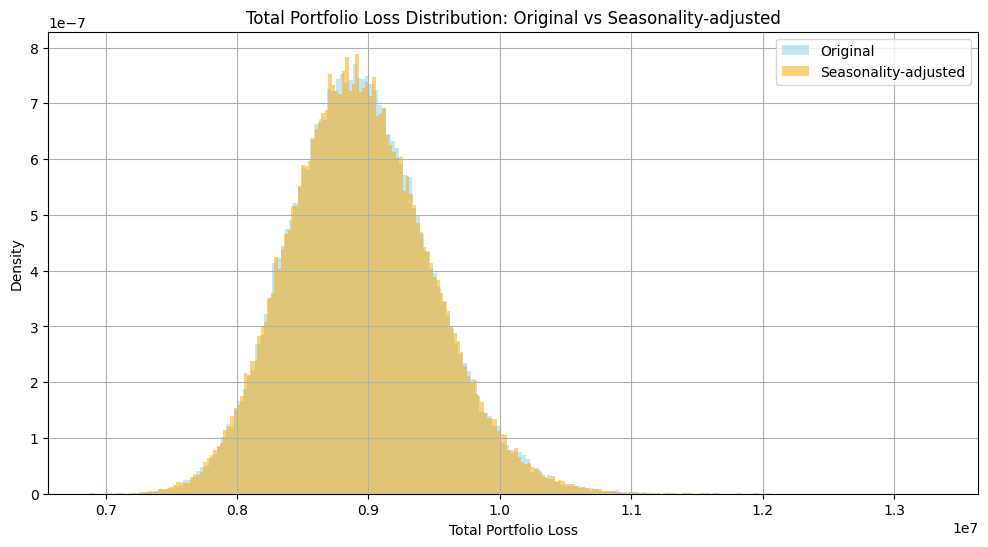

In [34]:
# --- 1. Numerical comparison table ---
def compare_pml_tvar(original_metrics, seasonal_metrics, PML_percentiles=[95, 99, 99.5]):
    lines = original_metrics.keys()
    
    for line in lines:
        print(f"\n=== {line} Comparison ===")
        for p in PML_percentiles:
            orig_pml = original_metrics[line][f'PML_{p}']
            seasonal_pml = seasonal_metrics[line][f'PML_{p}']
            pml_diff = seasonal_pml - orig_pml
            pml_pct = pml_diff / orig_pml * 100
            
            orig_tvar = original_metrics[line][f'TVaR_{p}']
            seasonal_tvar = seasonal_metrics[line][f'TVaR_{p}']
            tvar_diff = seasonal_tvar - orig_tvar
            tvar_pct = tvar_diff / orig_tvar * 100
            
            print(f"PML_{p}: Original = {orig_pml:,.0f}, Seasonality = {seasonal_pml:,.0f}, Change = {pml_pct:.2f}%")
            print(f"TVaR_{p}: Original = {orig_tvar:,.0f}, Seasonality = {seasonal_tvar:,.0f}, Change = {tvar_pct:.2f}%")
            
# Run the comparison
compare_pml_tvar(metrics, seasonal_metrics)

# --- 2. Overlay histogram of total portfolio losses ---
def plot_total_loss_comparison(original_losses, seasonal_losses, bins=200):
    plt.figure(figsize=(12,6))
    
    plt.hist(original_losses['Total'], bins=bins, alpha=0.5, label='Original', color='skyblue', density=True)
    plt.hist(seasonal_losses['Total'], bins=bins, alpha=0.5, label='Seasonality-adjusted', color='orange', density=True)
    
    plt.xlabel("Total Portfolio Loss")
    plt.ylabel("Density")
    plt.title("Total Portfolio Loss Distribution: Original vs Seasonality-adjusted")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_total_loss_comparison(simulated_losses, seasonal_losses)